<a href="https://colab.research.google.com/github/Brunomatarucco/bootcamp_data_science_alura/blob/main/Gastos_Procedimentos_DATASUS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Utilizando Python e pandas para análise de dados reais

Neste Notebook foi trabalhado com o Python, Pandas e Matplotlib para explorar os dados financeiros do SUS, mais precisamente os gastos por Unidade Federativa ao longo dos anos. Os desafios se iniciaram na aquisição dos dados em uma plataforma do governo, o processo passou pela leitura destes dados com o Pandas até a criação de hipóteses na área da saúde, que sempre de forma cuidadosa, simulando os desafios diários de uma pessoa cientista de dados.

##Aula 01 - Aquisição e leitura de dados reais

###Construindo o DataFrame

In [ ]:
#importando bibliotecas que serão usadas nesse notebook

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib import cm

In [ ]:
#Mudando a visualização dos números para quando for formatar números com ponto flutuante mostrar sempre com 2 casas decimais

pd.options.display.float_format = "{:.2f}".format

In [ ]:
#Leitura do arquivo e atribuição à uma váriavel como DataFrame. Servirá como base de dados para o bootcamp

valores2_csv = "https://raw.githubusercontent.com/Brunomatarucco/bootcamp_data_science_alura/main/dados_datasus.csv"
dados = pd.read_csv(valores2_csv, 
                    encoding="ISO-8859-1", 
                    skiprows= 3, skipfooter=12, engine = "python",
                    sep = ";", thousands=".", decimal = ",", na_values = "-")

###Descrição dos Parâmetros###
#1. O parâmetro encoding= "ISO-8859-1" é usado para que os simbolos usados no pt-br(Acentos e 'ç') sejam lidos
#2. O parâmetro skiprows=3 é utilizado para que o arquivo lido pule as três primeiras linhas ao ser lido
#3. O skipfooter=12 tem uma função similar ao skiprows mas serve para remover as linhas de baixo
#4. O parâmetro sep=";" sinaliza ao pandas que ao ler o arquivo separe os dados de acordo com os ";"
#5. e 6. Os parâmetros (thousands, decimal) demarcam que os dados númericos não sejam "transformados" em strings \/
#e lidos de forma que os . do arquivo marquem os milhares e a , marque que à sua direita vem marcas decimais 
#e o arquivo seja considerado um arquivo python
#7. o parâmetro na_values atribui à um certo caracter (neste caso o -) que seja lido como NaN, ou seja, "vazio"

In [ ]:
dados.head()

Unidade da Federação  1992/Mar  ...    2020/Ago         Total
0          11 Rondônia       nan  ...  3556381.57  929129659.72
1              12 Acre       nan  ...         nan  420668039.63
2          13 Amazonas       nan  ...  4726485.73 1771654871.23
3           14 Roraima       nan  ...  1524478.04  305010883.18
4              15 Pará       nan  ... 11559714.54 4437115730.71

[5 rows x 280 columns]

In [ ]:
dados.describe()

1992/Mar  1992/Abr  1993/Mai  ...     2020/Jul     2020/Ago          Total
count      1.00      1.00      1.00  ...        27.00        26.00          27.00
mean   40243.16  11449.99  34583.77  ...  40717083.95  19880851.12  5993724452.01
std         nan       nan       nan  ...  56808984.40  28398050.32  8057775772.23
min    40243.16  11449.99  34583.77  ...   1163813.08    834187.31   291637984.75
25%    40243.16  11449.99  34583.77  ...  12795934.52   5088420.54  1904289327.91
50%    40243.16  11449.99  34583.77  ...  22233542.26  10870487.02  2477372149.60
75%    40243.16  11449.99  34583.77  ...  55331317.58  24578329.33  7685527172.18
max    40243.16  11449.99  34583.77  ... 282709570.31 140414944.95 38929353900.57

[8 rows x 279 columns]

In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Columns: 280 entries, Unidade da Federação to Total
dtypes: float64(279), object(1)
memory usage: 59.2+ KB


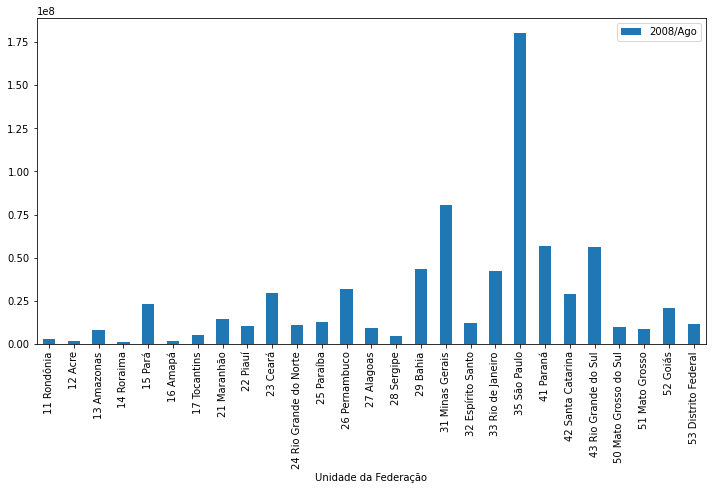

In [ ]:
dados.plot(x="Unidade da Federação",y="2008/Ago",kind = "bar", figsize = (12,6))

Text(0.5, 1.0, 'Valor por Unidade da Federação')

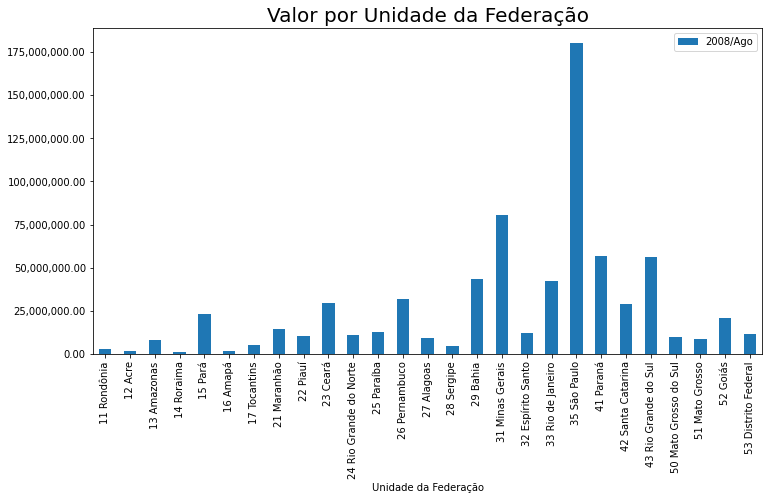

In [ ]:
ax = dados.plot(x="Unidade da Federação",y="2008/Ago",kind = "bar", figsize = (12,6))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
ax.set_title("Valor por Unidade da Federação", fontsize = 20)

#A função yaxis.set_major_formatter, com o ticker.StrMethodFormatter possibilitou que o eixo y fosse formatado 
#para exibir 2 casa decimais e separar os milhares por uma virgula para uma melhor visualização

###Desafios

####Desafio 01: Melhorar o título

Escolher um título mais descritivo, que passe a mensagem adequada ao gráfico de barras.

Text(0, 0.5, 'Valor em R$')

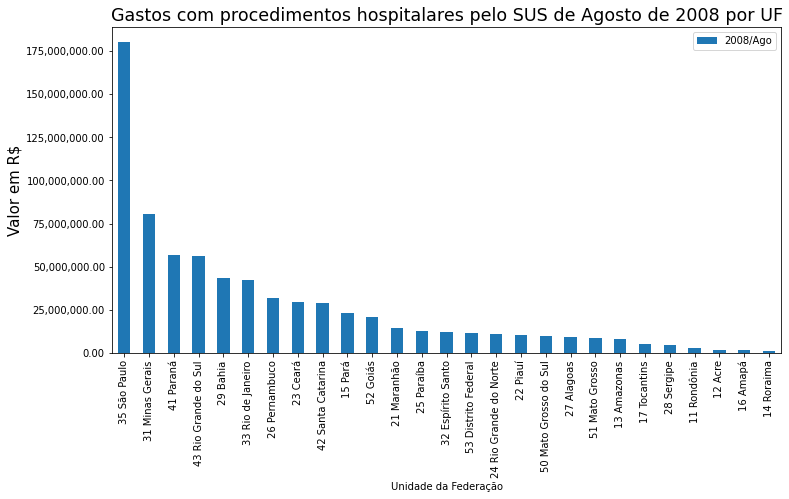

In [ ]:
ax = dados.sort_values(by="2008/Ago",ascending=False).plot(x="Unidade da Federação",y="2008/Ago",kind = "bar", figsize = (12,6))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
ax.set_title("Gastos com procedimentos hospitalares pelo SUS de Agosto de 2008 por UF", fontsize = 17.5)
ax.set_ylabel("Valor em R$", fontsize = 15)

####Desafio 02: Fazer análise de dados atualizados



Faça a mesma análise realizada em aula, porém para o mês mais recente.

Text(0, 0.5, 'Valor em R$')

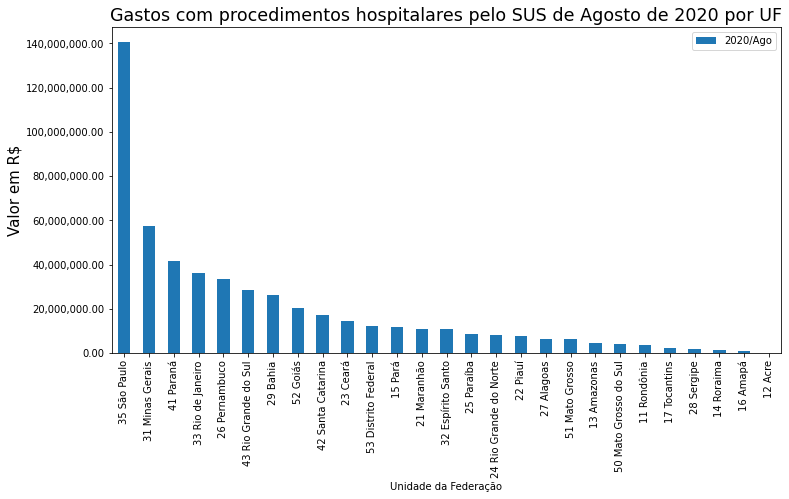

In [ ]:
ax = dados.sort_values(by = "2020/Ago",ascending = False).plot(x="Unidade da Federação", 
                                                                        y="2020/Ago",kind = "bar", 
                                                                        figsize = (12,6))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
ax.set_title("Gastos com procedimentos hospitalares pelo SUS de Agosto de 2020 por UF", fontsize = 17.5)
ax.set_ylabel("Valor em R$", fontsize = 15)

####Desafio próprio 01: Comparação de dados

Comparar os gastos de agosto de 2008 e 2020

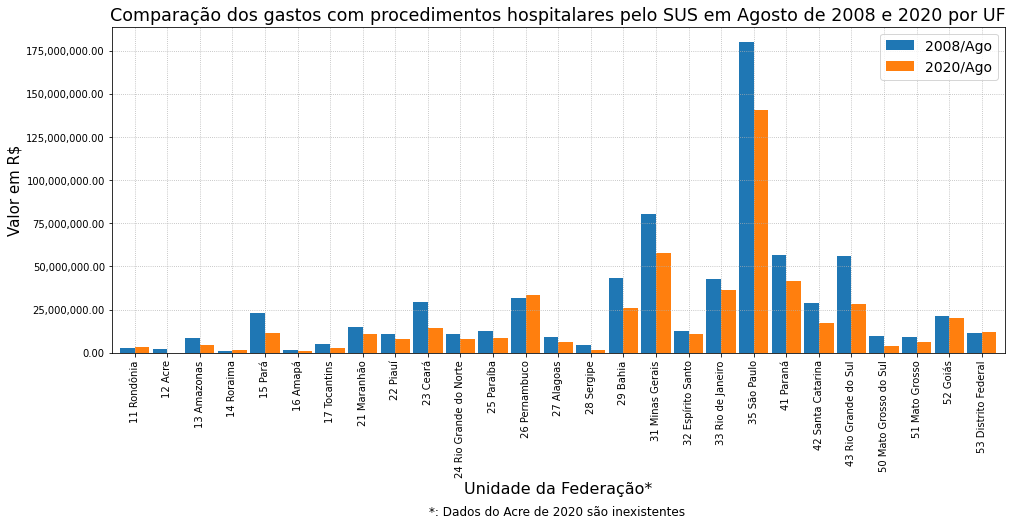

In [ ]:
ax = dados.plot(x="Unidade da Federação", y = ["2008/Ago","2020/Ago"], kind = "bar", figsize= (16,6), width = 0.9)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
ax.set_title("Comparação dos gastos com procedimentos hospitalares pelo SUS em Agosto de 2008 e 2020 por UF", fontsize = 17.5)
ax.set_ylabel("Valor em R$", fontsize = 15)
ax.set_xlabel("Unidade da Federação*", fontsize = 16)
ax.grid(linestyle = ":")
plt.legend(fontsize = 14)
plt.text(0.355,-0.5,"*: Dados do Acre de 2020 são inexistentes", fontsize = 12, transform=ax.transAxes)
plt.show()

##Aula 02 - Primeiras visualizações de dados

###Limpando os dados

In [ ]:
#Visualizando duas colunas

dados[["2008/Ago","2008/Set"]]

2008/Ago     2008/Set
0    2938286.29   2843930.91
1    1886871.84   2084884.80
2    8331763.97   8148089.92
3    1045291.11   1003740.89
4   23259148.28  23667690.01
5    1550340.63   1550166.99
6    5213290.38   5201400.94
7   14609872.57  15317881.85
8   10645917.52  11037940.55
9   29304821.51  30435026.82
10  10812840.19  11258681.53
11  12673774.35  12790639.17
12  31705296.79  30703879.20
13   9262767.68   9228201.96
14   4543252.50   4525676.82
15  43254543.33  42851268.02
16  80374117.08  82400146.79
17  12384068.19  12486952.61
18  42487939.51  43066461.47
19 179898070.22 180082203.71
20  56699001.13  58091985.79
21  28887854.62  30725718.78
22  56233758.74  57910170.98
23   9602843.49  10272466.74
24   8987811.95   8843061.60
25  21041071.33  21396098.51
26  11548451.89  12422577.60

In [ ]:
#Visualizar os dados das primeiras 5 linhas de todas as colunas

dados.head()

Unidade da Federação  1992/Mar  ...    2020/Ago         Total
0          11 Rondônia       nan  ...  3556381.57  929129659.72
1              12 Acre       nan  ...         nan  420668039.63
2          13 Amazonas       nan  ...  4726485.73 1771654871.23
3           14 Roraima       nan  ...  1524478.04  305010883.18
4              15 Pará       nan  ... 11559714.54 4437115730.71

[5 rows x 280 columns]

In [ ]:
#Foi possível verificar que no DataFrame existem dados vazios que foram substituidos por um valor NaN(Not a Number) ao montar o DataFrame.
#Nesse passo, criamos um novo DataFrame que se baseou no primeiro porém sem nenhuma coluna que tivesse dados NaN
#O dropna retira do df as linhas ou colunas em que os dados estão como NaN
#o parâmetro axis = 1 se refere à coluna, dessa forma foram retirados os meses que continham dados vazios

dados_sliced = dados.dropna(axis=1)

In [ ]:
# Retirada da coluna Total, pois ela não está agregando ao estudo e somento enviesando os gráficos nesse momento.

dados_sliced.drop("Total",axis = 1, inplace = True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
dados_sliced.head()

Unidade da Federação  2007/Ago  2007/Set  ...    2020/Mai    2020/Jun    2020/Jul
0          11 Rondônia   4209.37  16397.03  ...  8581195.13  9193593.76  7407388.24
1              12 Acre  10470.07  14001.71  ...  2383895.48  2199920.70  1163813.08
2          13 Amazonas  35752.72  45570.64  ... 19441150.53 17509334.66 13358514.02
3           14 Roraima   4785.91  11858.63  ...  2910776.44  3216466.51  2739498.41
4              15 Pará 181159.29 433414.74  ... 41248502.78 35396030.78 27618727.51

[5 rows x 157 columns]

In [ ]:
#Foi selecionada a coluna "Unidade da Federação" para servir como Index do DataFrame

dados_sliced.set_index("Unidade da Federação", inplace=True)

In [ ]:
dados_sliced.head()

2007/Ago  2007/Set  ...    2020/Jun    2020/Jul
Unidade da Federação                      ...                        
11 Rondônia            4209.37  16397.03  ...  9193593.76  7407388.24
12 Acre               10470.07  14001.71  ...  2199920.70  1163813.08
13 Amazonas           35752.72  45570.64  ... 17509334.66 13358514.02
14 Roraima             4785.91  11858.63  ...  3216466.51  2739498.41
15 Pará              181159.29 433414.74  ... 35396030.78 27618727.51

[5 rows x 156 columns]

In [ ]:
#Checagem dos dados que estão no index, usando o .index

dados_sliced.index

Index(['11 Rondônia', '12 Acre', '13 Amazonas', '14 Roraima', '15 Pará',
       '16 Amapá', '17 Tocantins', '21 Maranhão', '22 Piauí', '23 Ceará',
       '24 Rio Grande do Norte', '25 Paraíba', '26 Pernambuco', '27 Alagoas',
       '28 Sergipe', '29 Bahia', '31 Minas Gerais', '32 Espírito Santo',
       '33 Rio de Janeiro', '35 São Paulo', '41 Paraná', '42 Santa Catarina',
       '43 Rio Grande do Sul', '50 Mato Grosso do Sul', '51 Mato Grosso',
       '52 Goiás', '53 Distrito Federal'],
      dtype='object', name='Unidade da Federação')

In [ ]:
#Exibindo dados de uma coluna selecionada, colocando o index o UF, é possivel exibir a series sempre mostrando o UF referente.

dados_sliced["2007/Ago"].head()

Unidade da Federação
11 Rondônia     4209.37
12 Acre        10470.07
13 Amazonas    35752.72
14 Roraima      4785.91
15 Pará       181159.29
Name: 2007/Ago, dtype: float64

In [ ]:
#Aqui foi feita a mesma coisa que o código superior feito na linha superior, porém a partir do eixo y

dados_sliced.loc["12 Acre"].head()

2007/Ago    10470.07
2007/Set    14001.71
2007/Out    86200.85
2007/Nov   301323.68
2007/Dez   769612.36
Name: 12 Acre, dtype: float64

In [ ]:
#Visualizar novamente como está o DataFrame depois de algumas edições

dados_sliced.head()

2007/Ago  2007/Set  ...    2020/Jun    2020/Jul
Unidade da Federação                      ...                        
11 Rondônia            4209.37  16397.03  ...  9193593.76  7407388.24
12 Acre               10470.07  14001.71  ...  2199920.70  1163813.08
13 Amazonas           35752.72  45570.64  ... 17509334.66 13358514.02
14 Roraima             4785.91  11858.63  ...  3216466.51  2739498.41
15 Pará              181159.29 433414.74  ... 35396030.78 27618727.51

[5 rows x 156 columns]

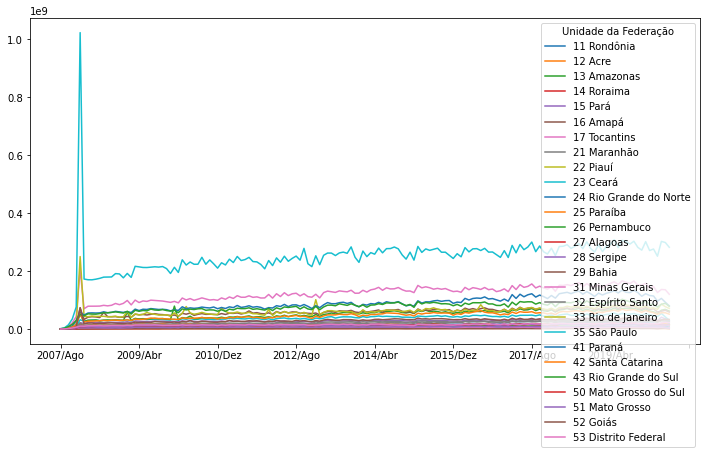

In [ ]:
#a função T faz com que os eixos x e y sejam invertidos, jogando as datas para o index e os UF para as colunas

dados_sliced.T.plot(figsize=(12,6))

###Desafios

####Desafio 03: Reposicionar legenda


Reposicionar a legenda do gráfico em uma posição mais adequada

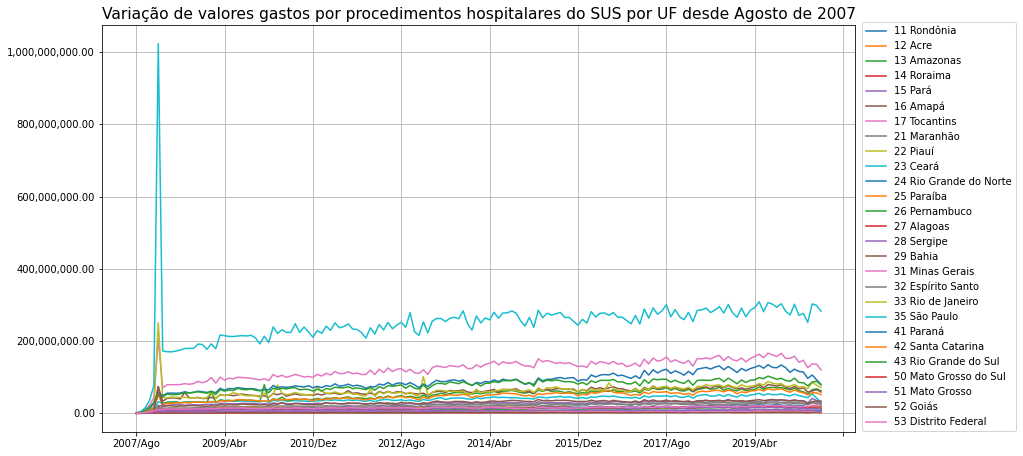

In [ ]:
#o parâmetro bbox_to_anchor do plt.legend permite atribuição de valores que correspondem à localizações do gráfico

ax = dados_sliced.T.plot(figsize=(13.5,7.48), grid = True)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
ax.set_title("Variação de valores gastos por procedimentos hospitalares do SUS por UF desde Agosto de 2007", fontsize = 15.5)
plt.legend(bbox_to_anchor=(1.22, 1.02), loc = "upper right")
plt.show()

####Desafio 04: Plotar gráfico selecionando dados

Plotar o gráfico de linha com apenas 5 estados de sua preferência

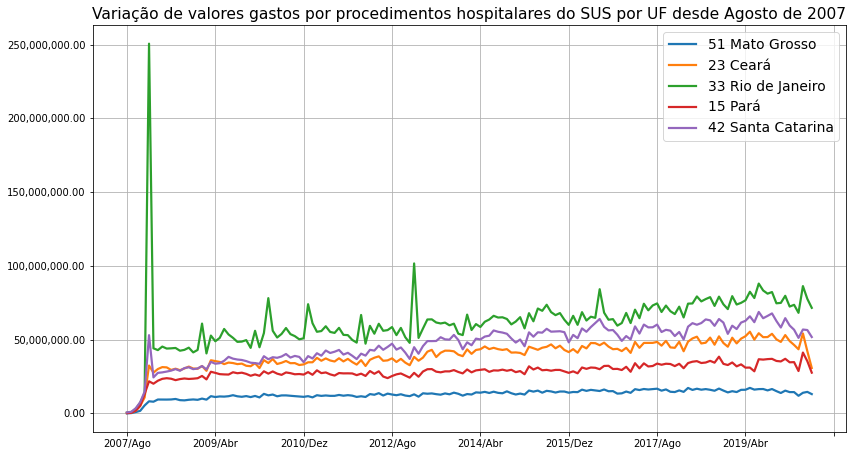

In [ ]:
ax = dados_sliced.loc[['51 Mato Grosso', '23 Ceará',
       '33 Rio de Janeiro', '15 Pará', '42 Santa Catarina']].T.plot(figsize=(13.5,7.48), grid = True, linewidth = 2.2)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
ax.set_title("Variação de valores gastos por procedimentos hospitalares do SUS por UF desde Agosto de 2007", fontsize = 15.5)
plt.legend(bbox_to_anchor=(1, 1), loc = "upper right", fontsize = 13.85)
plt.show()

####Desafio Próprio 02: Plotar gráfico dos estados separados por região

Plotar um gráfico de linha para cada Região, mostrando seus gastos

In [ ]:
#Criação de váriaveis para as regiões geográficas do país em formato de lista

norte = ['11 Rondônia', '12 Acre', '13 Amazonas', 
         '14 Roraima', '15 Pará','16 Amapá', '17 Tocantins']
nordeste = ['21 Maranhão', '22 Piauí', '23 Ceará',
       '24 Rio Grande do Norte', '25 Paraíba', '26 Pernambuco', 
       '27 Alagoas', '28 Sergipe', '29 Bahia']
sudeste = ['31 Minas Gerais', '32 Espírito Santo',
       '33 Rio de Janeiro', '35 São Paulo']
sul = ['41 Paraná', '42 Santa Catarina','43 Rio Grande do Sul']
centro_oeste = ['50 Mato Grosso do Sul', '51 Mato Grosso',
       '52 Goiás', '53 Distrito Federal']

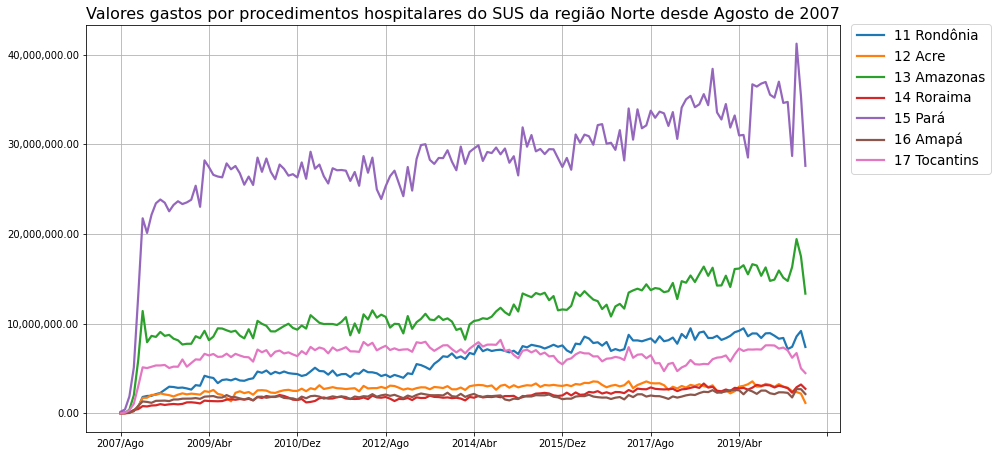

In [ ]:
ax = dados_sliced.loc[norte].T.plot(figsize=(13.5,7.48), grid = True, linewidth = 2.2)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
ax.set_title("Valores gastos por procedimentos hospitalares do SUS da região Norte desde Agosto de 2007", fontsize = 16)
plt.legend(bbox_to_anchor=(1.21, 1.02), loc = "upper right", fontsize = 13.5)
plt.show()

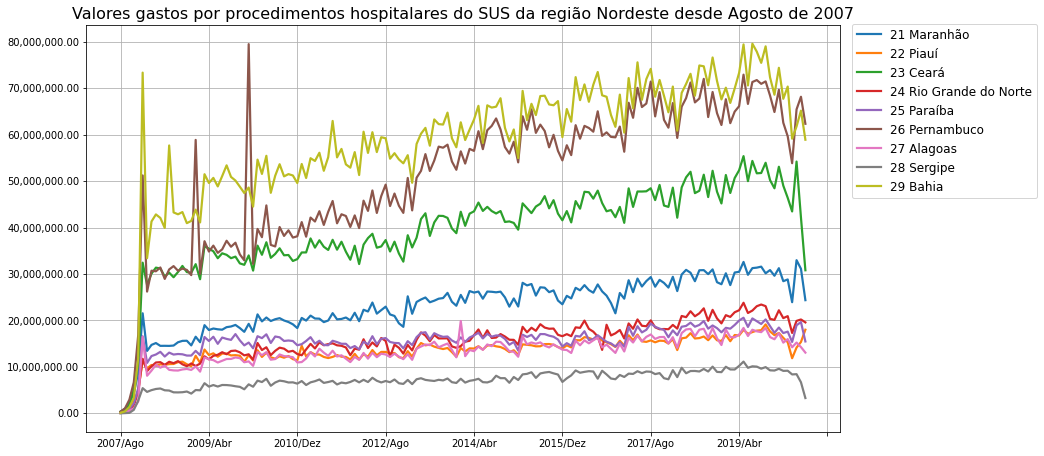

In [ ]:
ax = dados_sliced.loc[nordeste].T.plot(figsize=(13.5,7.48), grid = True, linewidth = 2.2)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
ax.set_title("Valores gastos por procedimentos hospitalares do SUS da região Nordeste desde Agosto de 2007", fontsize = 16)
plt.legend(bbox_to_anchor=(1.27, 1.018), loc = "upper right", fontsize = 12)
plt.show()

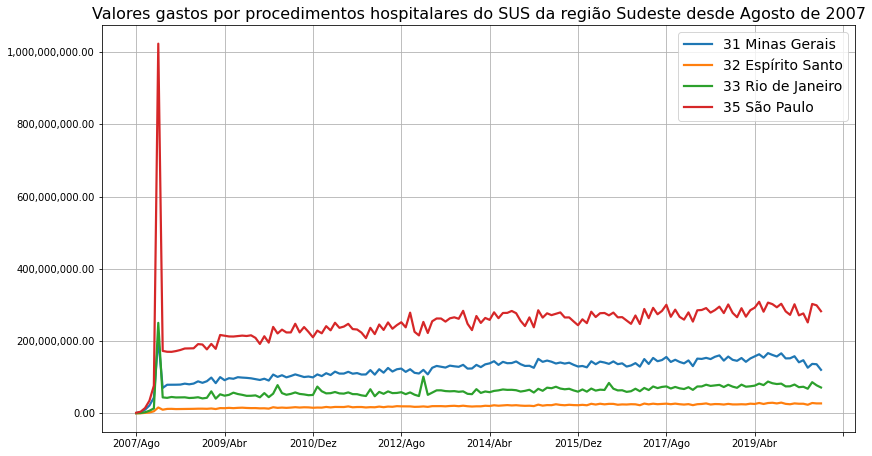

In [ ]:
ax = dados_sliced.loc[sudeste].T.plot(figsize=(13.5,7.48), grid = True, linewidth = 2.2)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
ax.set_title("Valores gastos por procedimentos hospitalares do SUS da região Sudeste desde Agosto de 2007", fontsize = 16)
plt.legend(bbox_to_anchor=(1., 1.), loc = "upper right", fontsize = 14)
plt.show()

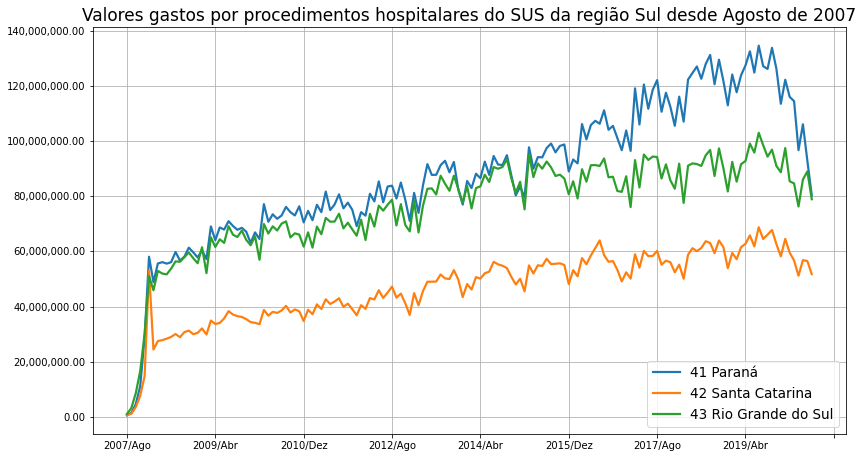

In [ ]:
ax = dados_sliced.loc[sul].T.plot(figsize=(13.5,7.48), grid = True, linewidth = 2.2)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
ax.set_title("Valores gastos por procedimentos hospitalares do SUS da região Sul desde Agosto de 2007", fontsize = 17)
plt.legend( loc = "lower right", fontsize = 13.5)
plt.show()

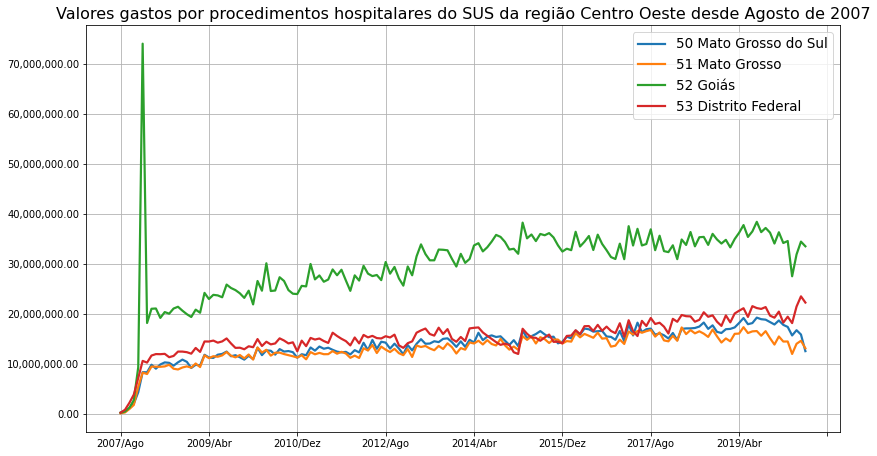

In [ ]:
ax = dados_sliced.loc[centro_oeste].T.plot(figsize=(13.5,7.48), grid = True, linewidth = 2.2)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
ax.set_title("Valores gastos por procedimentos hospitalares do SUS da região Centro Oeste desde Agosto de 2007", fontsize = 16)
plt.legend(loc = "upper right", fontsize = 13.5)
plt.show()

##Aula 03 - Manipulação de dados

###Fazendo Slices e manipulando dados

In [ ]:
#Visualizar o index depois de aplicar o T, mostrando os 5 primeiros dados;

dados_sliced.T.index[:5]

Index(['2007/Ago', '2007/Set', '2007/Out', '2007/Nov', '2007/Dez'], dtype='object')

In [ ]:
#Visualizar os nomes das colunas depois de aplicar o T, mostrando os 5 primeiros dados;

dados_sliced.T.columns[:5]

Index(['11 Rondônia', '12 Acre', '13 Amazonas', '14 Roraima', '15 Pará'], dtype='object', name='Unidade da Federação')

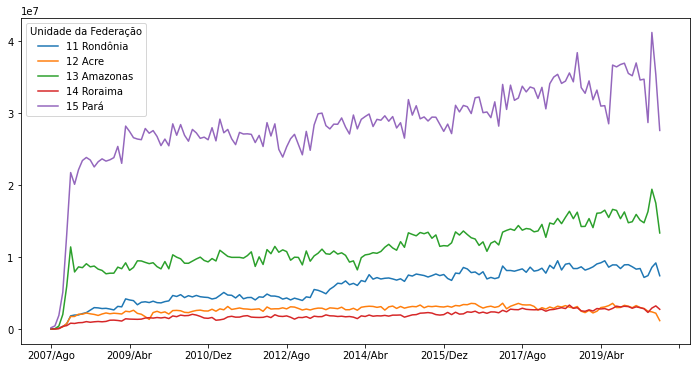

In [ ]:
#Essa é uma forma de plotar o gráfico dos 5 primeiros UFs, colocando o [:5] pra selecionar os 5 primeiros (na ordem que veio no df)

dados_sliced[:5].T.plot(figsize=(12,6))

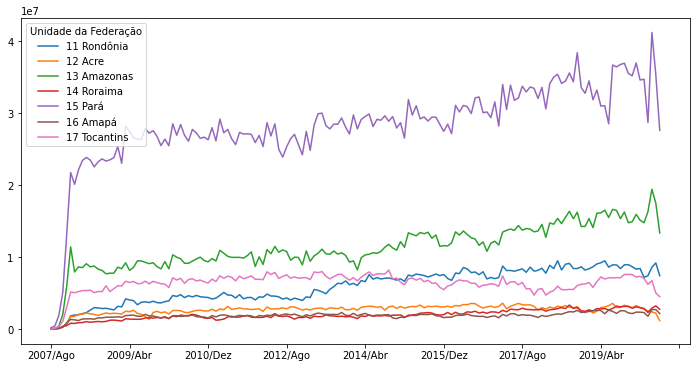

In [ ]:
#Mesma coisa que a superior porém dos 7 primeiros Ufs (na ordem que veio no df)

dados_sliced[:7].T.plot(figsize=(12,6))

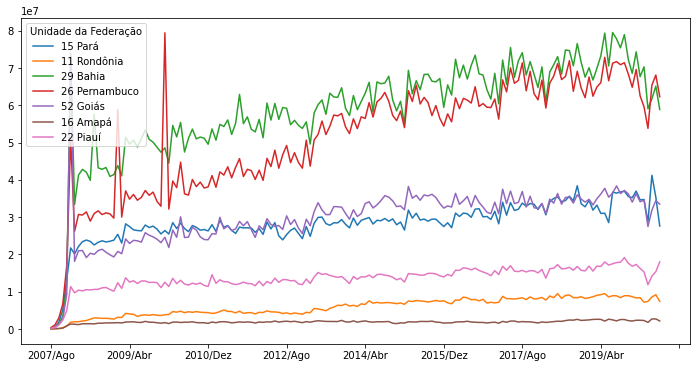

In [ ]:
#A ideia aqui é gerar um gráfico plotando 
#O np.random.seed gera um valor para basear o valor aleatório para a função sample
#

np.random.seed(2687)
dados_sliced.sample(n=7).T.plot(figsize=(12,6))

In [ ]:
#Criação da coluna "Total" somando as informações por UF
dados_sliced["Total"] = dados_sliced.sum(axis=1)

#Reorganizar o DataFrame de acordo com os valores totais, sendo o maior o primeiro
dados_ordenado_por_total = dados_sliced.sort_values(by="Total",ascending=False)

#Retirada a coluna "Total" do df para não atrapalhar a plotagem
dados_ordenado_por_total.drop("Total", axis=1,inplace=True)

#Ver o df ordenado
dados_ordenado_por_total.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


2007/Ago   2007/Set  ...     2020/Jun     2020/Jul
Unidade da Federação                        ...                          
35 São Paulo         1665349.90 4434168.64  ... 299060851.62 282709570.31
31 Minas Gerais       971394.37 2861781.50  ... 135977571.87 120467187.34
41 Paraná             554800.22 1431708.01  ...  92901461.36  80320852.69
43 Rio Grande do Sul 1049252.33 3182913.14  ...  89019478.82  78929703.81
33 Rio de Janeiro     469469.34  921646.57  ...  77604925.21  71540227.33

[5 rows x 156 columns]

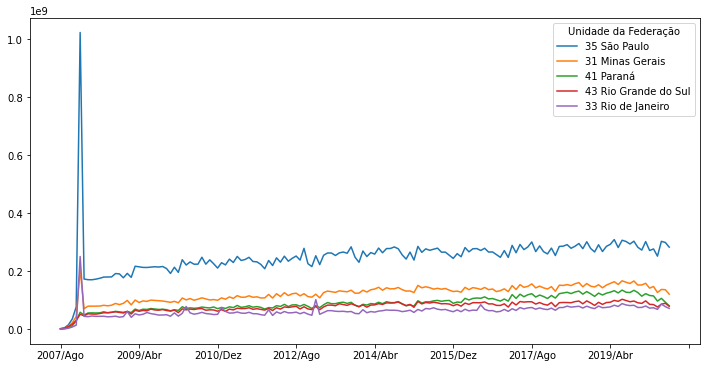

In [ ]:
#Plotar o gráfico que representa os dados desde 2007 ordenados

dados_ordenado_por_total.head().T.plot(figsize=(12,6))

In [ ]:
#Cortar os dados para retirar os dados que estão destoando dos outros, deixando à partir de fev/2008

colunas_usaveis = dados_ordenado_por_total.columns[6:]
dados_usaveis = dados_ordenado_por_total[colunas_usaveis]

###Desafios

####Desafio 05: Mudar palete de cores



Escolher uma palete de cores mais adequada do matplotlib.

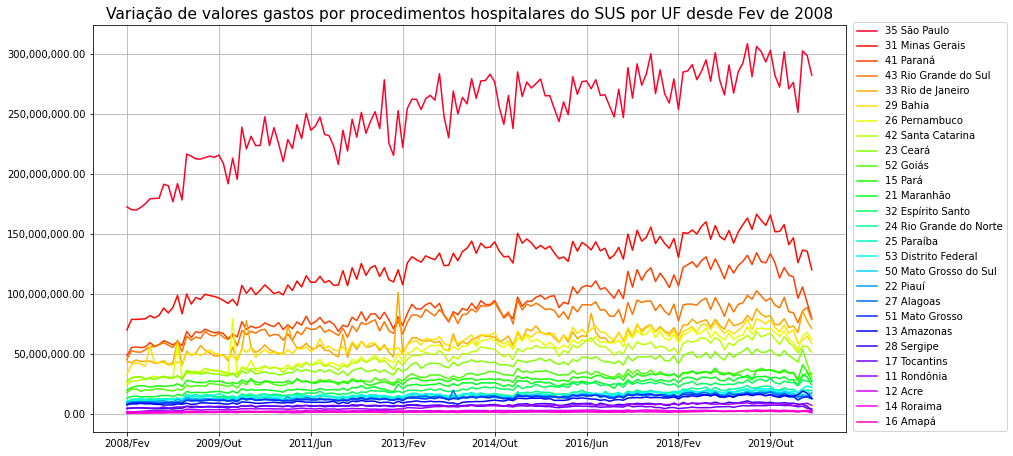

In [ ]:
#Plotar o gráfico de todos os UFs mostrando a mudança dos dados e colocando uma cor que diferencie

ax = dados_usaveis.T.plot(figsize=(13.5,7.48), grid = True, cmap = 'gist_rainbow' )
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
ax.set_title("Variação de valores gastos por procedimentos hospitalares do SUS por UF desde Fev de 2008", fontsize = 15.5)
plt.legend(bbox_to_anchor=(1.22, 1.02), loc = "upper right")
plt.show()

####Desafio 06: Criar coluna definindo a região do UF



Adicionar uma coluna mostrando a região (Norte, Nodeste, Sul, Suldeste e Centro-Oeste) de cada estado.

In [ ]:
#Os UFs tem números que referenciam a sua região. 
#OS UFs da dezena 10 é da região norte, 20 nordeste, 30 sudeste, 40 sul e 50 é centro-oeste

#Criação de um dicionário em que a primeira casa da dezena de seus UFs é o key que condiz com o nome da Região
regiao = {1:"Norte",2:"Nordeste",3:"Sudeste", 4: "Sul",5:"Centro-Oeste"}

#Criar uma nova coluna com nome Região e pegar a primeira string do index daquela linha, 
#assim pegar a coluna fica com o número da dezena condizente à sua região
dados_usaveis["Regiao"] = dados_usaveis.index.str[0]

#O lambda itera sobre a coluna "Região" e substitui o valor da dezena pelo nome da região, buscando a informação do dicionário regiao
dados_usaveis["Regiao"] = dados_usaveis["Regiao"].map(lambda x: regiao[int(x)])
dados_usaveis.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


2008/Fev     2008/Mar  ...     2020/Jul   Regiao
Unidade da Federação                            ...                      
35 São Paulo         172834914.73 170481849.56  ... 282709570.31  Sudeste
31 Minas Gerais       70301089.50  79119005.51  ... 120467187.34  Sudeste
41 Paraná             48855046.46  55611791.07  ...  80320852.69      Sul
43 Rio Grande do Sul  45897704.82  52928695.92  ...  78929703.81      Sul
33 Rio de Janeiro     44122593.19  42892665.52  ...  71540227.33  Sudeste

[5 rows x 151 columns]

####Desafio 07: Plotar gráfico de 5 estados com uma aparência bacana

Formatar o gráfico de custos por mês dos 5 estados, deixando ele agradável (Bonitão, segundo o Gui)

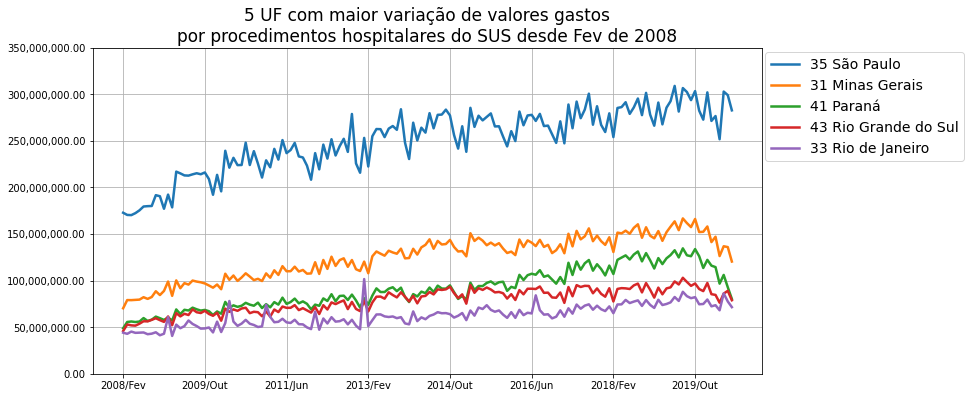

In [ ]:
ax = dados_usaveis.head().T[:150].plot(figsize=(12,6), linewidth = 2.5)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
ax.set_title("5 UF com maior variação de valores gastos\npor procedimentos hospitalares do SUS desde Fev de 2008", fontsize = 17)
plt.legend(bbox_to_anchor=(1.312,1.008), loc = "upper right", fontsize=14)
plt.grid(which = "major",linestyle = "-")
plt.ylim(0,350000000)
plt.show()

####Desafio 08: Adicionar meu estado ao gráfico anterior

Adicione o seu estado aos 5 estados plotados anteriormente

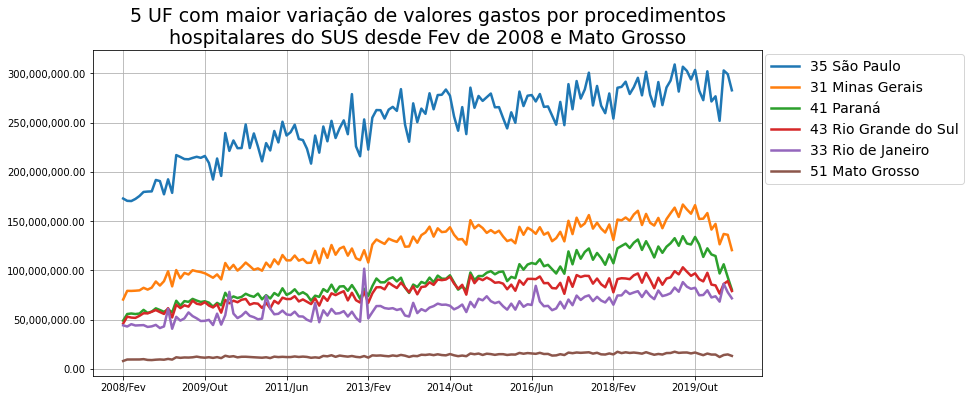

In [ ]:
UF_aleatorio = '51 Mato Grosso'
dados_para_desafio = dados_usaveis.head().T
dados_para_desafio[UF_aleatorio] = dados_usaveis.loc[UF_aleatorio]
ax = dados_para_desafio[:150].plot(figsize=(12,6), linewidth = 2.5)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
ax.set_title("5 UF com maior variação de valores gastos por procedimentos\nhospitalares do SUS desde Fev de 2008 e Mato Grosso", fontsize = 19)
plt.legend(bbox_to_anchor=(1.312,1.008), loc = "upper right", fontsize=14)
plt.grid(which = "major",linestyle = "-")
plt.show()

####Desafio 09: Estudar hipótese de casos de dengue afetando os valores gastos





Buscar os casos de dengue no Brasil (época de maior número de casos e regiões mais atingidas) e se os picos de alguns estados em fevereiro e verão de modo geral, pode ser reflexos dos casos de dengue.

Dados para estuo de São Paulo obtidos no site https://www.gov.br/saude/pt-br/assuntos/noticias/cresce-em-264-o-numero-de-casos-de-dengue-no-pais#denguee , que é um site institucional da União Federativa Brasileira

In [ ]:
dengue_sp = {"Dengue": [3734, 83045], 'Chikungunya': [160,869], "Zika": [76,229]}
dengue_sp = pd.DataFrame.from_dict(dengue_sp, orient='index')

In [ ]:
dengue_sp.columns = [2018,2019]
dengue_sp.head()

2018   2019
Dengue       3734  83045
Chikungunya   160    869
Zika           76    229

In [ ]:
saopaulo_2018 = dados_usaveis.loc["35 São Paulo"][119:131]
saopaulo_2019 = dados_usaveis.loc["35 São Paulo"][131:143]

In [ ]:
soma_2018 = saopaulo_2018.sum()
soma_2019 = saopaulo_2019.sum()

In [ ]:
print(soma_2018, soma_2019, dengue_sp[2018].sum(), dengue_sp[2019].sum())

3379988056.3800006 3488394774.5600004 3970 84143


O intuito nas linhas acima foi avaliar o crescimento dos gastos no estado de São Paulo e comparar com o crescimento de casos de Dengue, Chikungunya e Zika nos anos de 2018 e 2019 que foi bem grande.

O resultado na verdade não apresenta uma correlação ou uma relação causalidade. Pois só de olhar os dados foi possivel ver que enquanto os casos de dengue, zika e chikungunya cresceram mais de 20 vezes de 2018 para 2019, os gastos do SUS tiveram um aumento de 10milhões, que podem parecer muito, mas colocando em perspectiva são algo em torno de 3% somente.

####Desafio 10: Estudo de hipotese de pico de gastos nos estados da região sudeste

Plotar o gráfico dos custos apenas dos estados da região sudeste e verificar se os picos de 2013/Fev teve comportamento similar em todos os demais estados da região

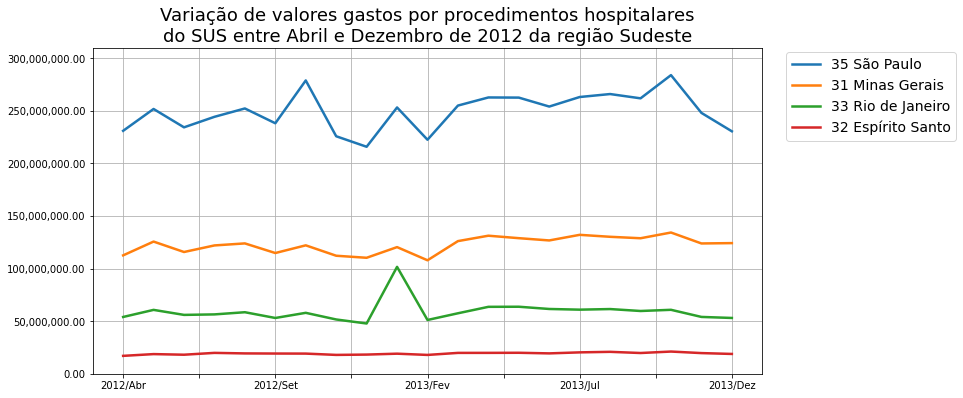

In [ ]:
ax = dados_usaveis.query("Regiao == 'Sudeste'").T[50:71].plot(figsize=(12,6), linewidth = 2.5)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
ax.set_title("Variação de valores gastos por procedimentos hospitalares\ndo SUS entre Abril e Dezembro de 2012 da região Sudeste", fontsize = 18)
plt.legend(bbox_to_anchor=(1.30,1.008), loc = "upper right", fontsize=14)
plt.grid(which = "major",linestyle = "-")
plt.ylim(0,310000000)
plt.show()

Somente do estado do Rio de Janeiro apresentou um pico de gastos no mês de Janeiro de 2013.

Tirando o estado de Espírito Santo, os estados: Minas Gerais e São Paulo tiveram um aumento de gastos em relação ao mês anterior e também ao mês seguinte, porém não acima da média de gastos do periodo que foi plotado o gráfico, de Abril de 2012 até Dezembro de 2013.

####Desafio 11: Adicionar um UF de outra região ao estudo para comparação

Adicionar seu estado escolhido novamente, deixe o gráfico informativo e tire conclusões sobre seus estados comparando com os demais. Tire suas conclusões e compartilhe com a gente.

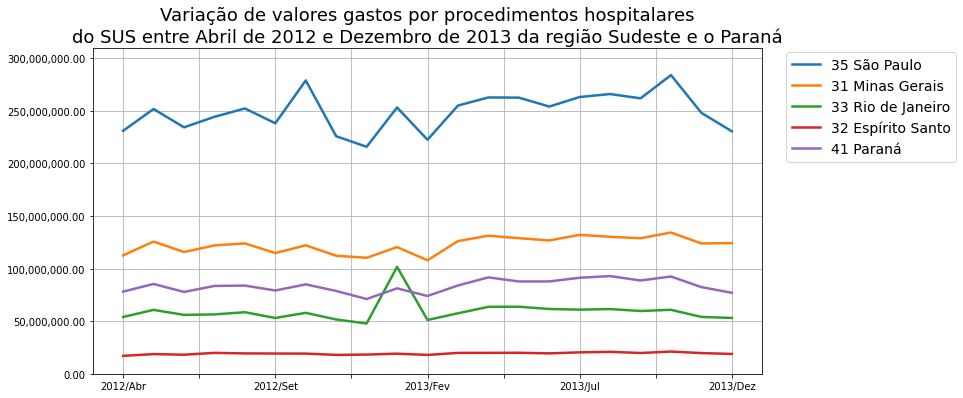

In [ ]:
UF_aleatorio = '41 Paraná'
dados_para_desafio = dados_usaveis.query("Regiao == 'Sudeste'").T
dados_para_desafio[UF_aleatorio] = dados_usaveis.loc[UF_aleatorio]
ax = dados_para_desafio[50:71].plot(figsize=(12,6), linewidth = 2.5)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
ax.set_title("Variação de valores gastos por procedimentos hospitalares\ndo SUS entre Abril de 2012 e Dezembro de 2013 da região Sudeste e o Paraná", fontsize = 18)
plt.legend(bbox_to_anchor=(1.30,1.008), loc = "upper right", fontsize=14)
plt.grid(which = "major",linestyle = "-")
plt.ylim(0,310000000)
plt.show()

Adicionando o estado do Paraná ao estudo feito foi possivel verificar uma tendência de variação de gastos de um estado de uma outra região aos gastos dos estados de São Paulo e Minas Gerais.

O estado do Rio de Janeiro apresento um comportamento incomum na variação de gastos nesse pico de Janeiro de 2013.

####Desafio Extra: Fazer slice dos dados para gráficos

Tentar plotar o gráfico sem o pico do inicio

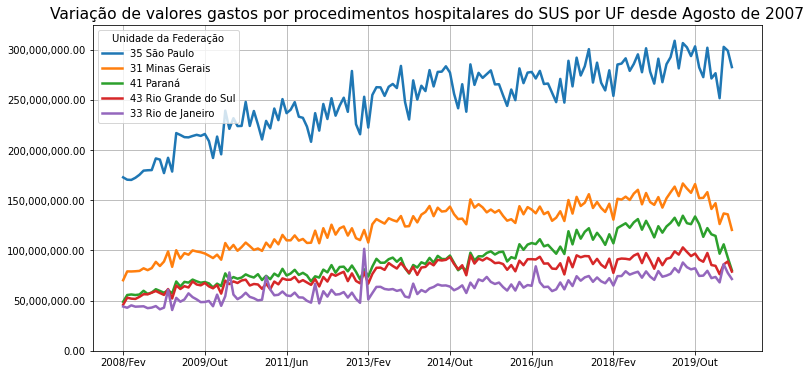

In [ ]:
ax = dados_usaveis.head().T[:150].plot(figsize=(12,6),grid=True,linewidth = 2.5)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
ax.set_title("Variação de valores gastos por procedimentos hospitalares do SUS por UF desde Agosto de 2007", fontsize = 15.5)
plt.ylim(0,325000000)
plt.show()


##Aula 04 -Análise de gráficos e criação de hipótese

###Fugindo de más práticas

In [ ]:
dados_usaveis.head()

2008/Fev     2008/Mar  ...     2020/Jul   Regiao
Unidade da Federação                            ...                      
35 São Paulo         172834914.73 170481849.56  ... 282709570.31  Sudeste
31 Minas Gerais       70301089.50  79119005.51  ... 120467187.34  Sudeste
41 Paraná             48855046.46  55611791.07  ...  80320852.69      Sul
43 Rio Grande do Sul  45897704.82  52928695.92  ...  78929703.81      Sul
33 Rio de Janeiro     44122593.19  42892665.52  ...  71540227.33  Sudeste

[5 rows x 151 columns]

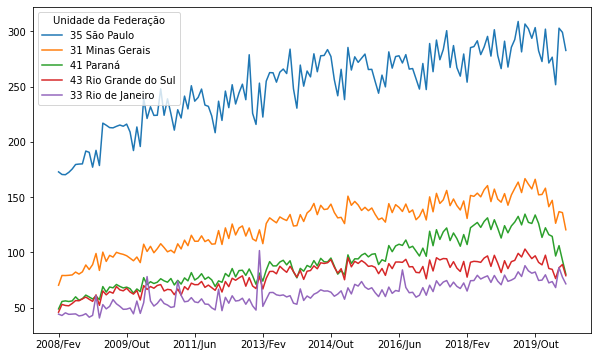

In [ ]:
# Nesse gráfico dividimos os valores por 1milhão pra deixar os dados mais visuais

dados_em_milhao = dados_usaveis.drop("Regiao", axis = 1)
dados_em_milhao = dados_em_milhao/1000000
dados_em_milhao.head().T.plot(figsize = (10,6))

plt.show()

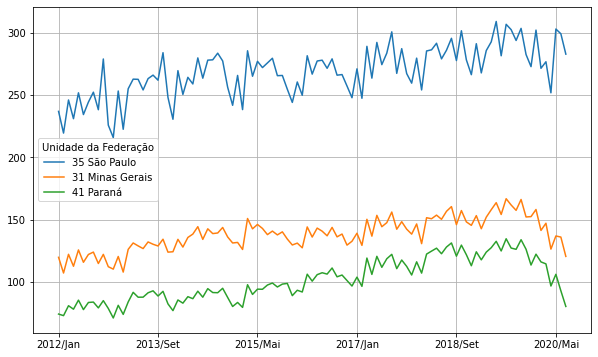

In [ ]:
# Aqui selecionamos alguns meses somente para visualizarmos os gráficos
# Isso pode apresentar uma problemática, pois limita a visão total dos dados

meses_filtrados = dados_em_milhao.columns[47:150] 
dados_em_milhao[meses_filtrados].head(3).T.plot(figsize = (10,6), grid=True)

(0.0, 350.0)

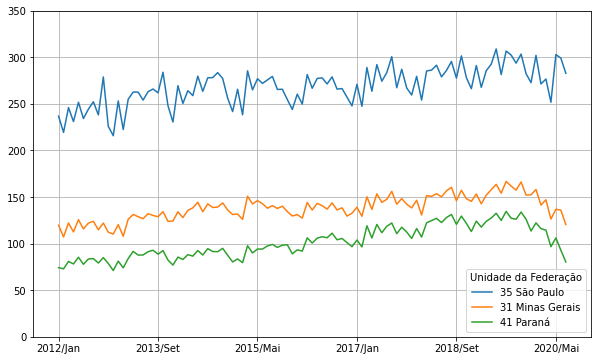

In [ ]:
# Aqui colocamos os valores em dinheiro à partir do zero

meses_filtrados = dados_em_milhao.columns[47:150] 
dados_em_milhao[meses_filtrados].head(3).T.plot(figsize = (10,6), grid=True)
plt.ylim(0,350)

(100.0, 350.0)

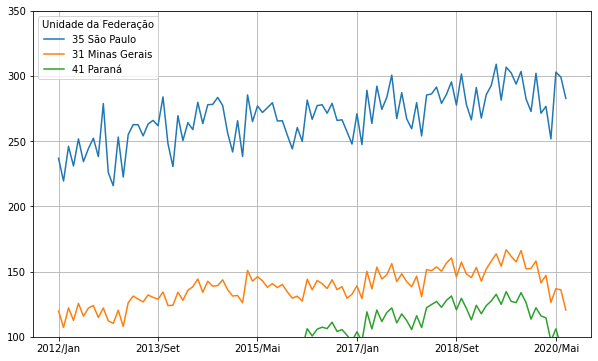

In [ ]:
# Cortamos o valor do eixo y para mostrar somente dos valores 100 até 350
# O problema de fazer isso é que a gente novamente limita e passa uma mensagem errada
# Podendo passar a mensagem que Minas Gerais tem um gasto muito baixo

meses_filtrados = dados_em_milhao.columns[47:150] 
dados_em_milhao[meses_filtrados].head(3).T.plot(figsize = (10,6), grid=True)
plt.ylim(100,350)

(0.0, 350.0)

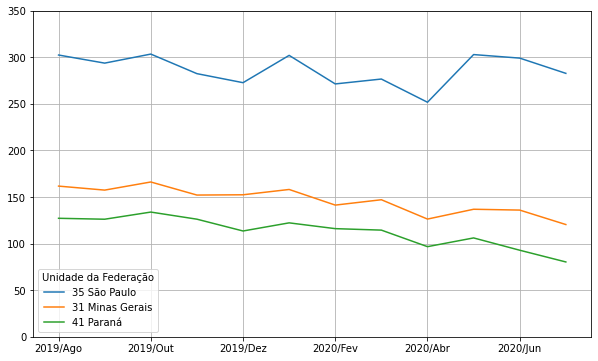

In [ ]:
# Exibição dos ultimos 12 meses dos dados

dados_em_milhao[dados_em_milhao.columns[-12:]].head(3).T.plot(figsize = (10,6), grid=True)
plt.ylim(0,350)

(0.0, 350.0)

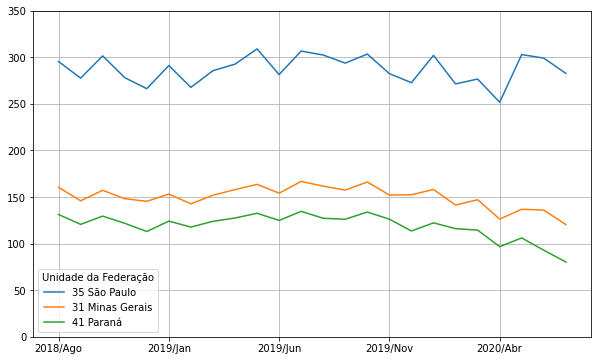

In [ ]:
# Exibição dos últimos 2 anos, 24 meses

dados_em_milhao[dados_em_milhao.columns[-24:]].head(3).T.plot(figsize = (10,6), grid=True)
plt.ylim(0,350)

(0.0, 350.0)

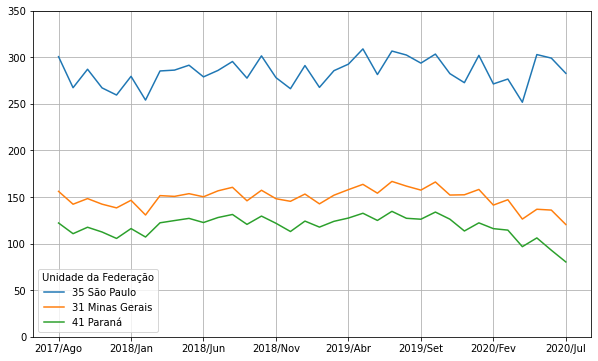

In [ ]:
# Plotar dados dos ultimos 3 anos

dados_em_milhao[dados_em_milhao.columns[-36:]].head(3).T.plot(figsize = (10,6), grid=True)
plt.ylim(0,350)

(0.0, 350.0)

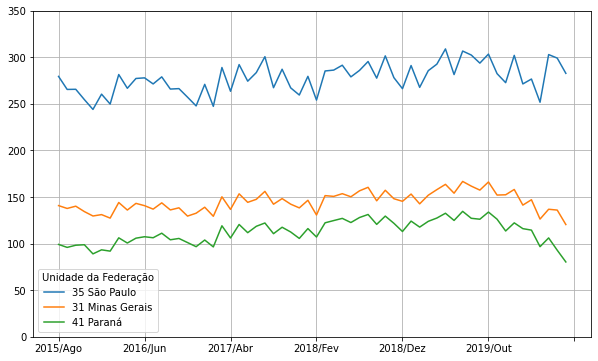

In [ ]:
# Exibição dos ultimos 5 anos, 60 meses.

dados_em_milhao[dados_em_milhao.columns[-60:]].head(3).T.plot(figsize = (10,6), grid=True)
plt.ylim(0,350)

(0.0, 350.0)

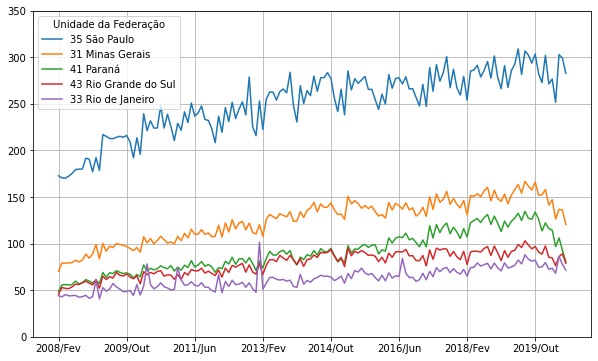

In [ ]:
# Comparar os gráficos com tamanhos diferentes
# Com uma visualização normal, numa largura legal

dados_em_milhao.head(5).T.plot(figsize = (10,6), grid=True)
plt.ylim(0,350)

(0.0, 350.0)

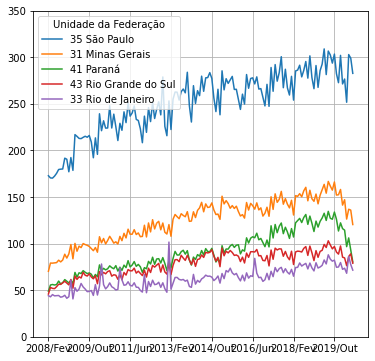

In [ ]:
# Comparar os gráficos com tamanhos diferentes
# Um gráfico quadrado compacta os dados

dados_em_milhao.head(5).T.plot(figsize = (6,6), grid=True)
plt.ylim(0,350)

(0.0, 350.0)

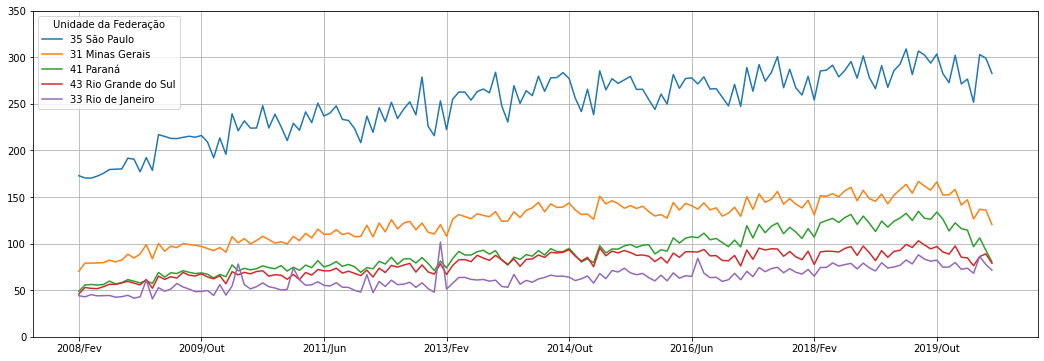

In [ ]:
#Comparar os gráficos com tamanhos diferentes
#Um gráfico bem largo pra mostrar os dados

dados_em_milhao.head(5).T.plot(figsize = (18,6), grid=True)
plt.ylim(0,350)

##Aula 05 - Manipulação e Interpretação de Gráficos

###Alternativas de visualizações

In [ ]:
#Montar uma série somente do último mês dos dados de internações

#Criação de uma variável com o ultimo mês
mes_mais_recente = dados_em_milhao.columns[-1]

#Criar a Serie que se baseia em um df pegando os dados do ultimo mês de informações
gastos_mais_recentes = dados_em_milhao[mes_mais_recente]
gastos_mais_recentes.head()

Unidade da Federação
35 São Paulo           282.71
31 Minas Gerais        120.47
41 Paraná               80.32
43 Rio Grande do Sul    78.93
33 Rio de Janeiro       71.54
Name: 2020/Jul, dtype: float64

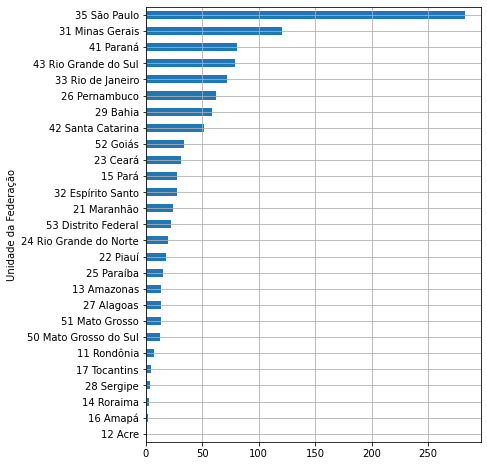

In [ ]:
#plotar o gráfico com barras horizontais

gastos_mais_recentes.sort_values().plot.barh(figsize = (6,8), grid = True)

Horrores da pizza:

- Legenda está péssima
- número de "fatias" é incompreensível
- desordem
- cores repetidas
- áreas de díficil análise/comparação

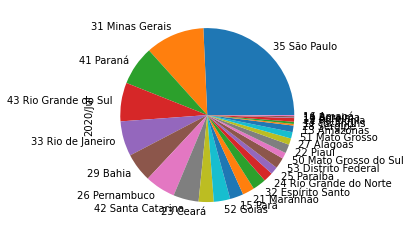

In [ ]:
gastos_mais_recentes.plot(kind = "pie")

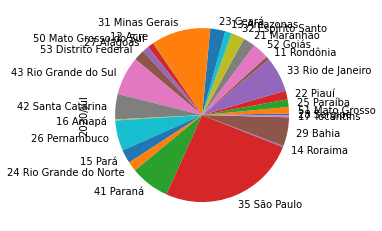

In [ ]:
gastos_mais_recentes.sample(frac = 1).plot(kind="pie")

In [ ]:
# Visualização mais simples dos dados até do que no gráfico de pizza

gastos_mais_recentes

Unidade da Federação
35 São Paulo             282.71
31 Minas Gerais          120.47
41 Paraná                 80.32
43 Rio Grande do Sul      78.93
33 Rio de Janeiro         71.54
29 Bahia                  58.90
26 Pernambuco             62.33
42 Santa Catarina         51.76
23 Ceará                  30.81
52 Goiás                  33.50
15 Pará                   27.62
21 Maranhão               24.37
32 Espírito Santo         27.46
24 Rio Grande do Norte    19.59
25 Paraíba                15.49
53 Distrito Federal       22.23
50 Mato Grosso do Sul     12.51
22 Piauí                  18.02
27 Alagoas                13.09
51 Mato Grosso            13.08
13 Amazonas               13.36
28 Sergipe                 3.31
17 Tocantins               4.49
11 Rondônia                7.41
12 Acre                    1.16
14 Roraima                 2.74
16 Amapá                   2.16
Name: 2020/Jul, dtype: float64

In [ ]:
#Tabela de criação levando em consideração um estado de referencia

gastos_mais_recentes/gastos_mais_recentes.loc["33 Rio de Janeiro"]

Unidade da Federação
35 São Paulo             3.95
31 Minas Gerais          1.68
41 Paraná                1.12
43 Rio Grande do Sul     1.10
33 Rio de Janeiro        1.00
29 Bahia                 0.82
26 Pernambuco            0.87
42 Santa Catarina        0.72
23 Ceará                 0.43
52 Goiás                 0.47
15 Pará                  0.39
21 Maranhão              0.34
32 Espírito Santo        0.38
24 Rio Grande do Norte   0.27
25 Paraíba               0.22
53 Distrito Federal      0.31
50 Mato Grosso do Sul    0.17
22 Piauí                 0.25
27 Alagoas               0.18
51 Mato Grosso           0.18
13 Amazonas              0.19
28 Sergipe               0.05
17 Tocantins             0.06
11 Rondônia              0.10
12 Acre                  0.02
14 Roraima               0.04
16 Amapá                 0.03
Name: 2020/Jul, dtype: float64

In [ ]:
(gastos_mais_recentes/gastos_mais_recentes.loc["33 Rio de Janeiro"]).head()

Unidade da Federação
35 São Paulo           3.95
31 Minas Gerais        1.68
41 Paraná              1.12
43 Rio Grande do Sul   1.10
33 Rio de Janeiro      1.00
Name: 2020/Jul, dtype: float64

###Desafios

####Desafio 12: Adicionar uma grid

Buscar na documentação do Matplotlib como colocar um grid nos gráficos e adicionar nos gráficos de barra.

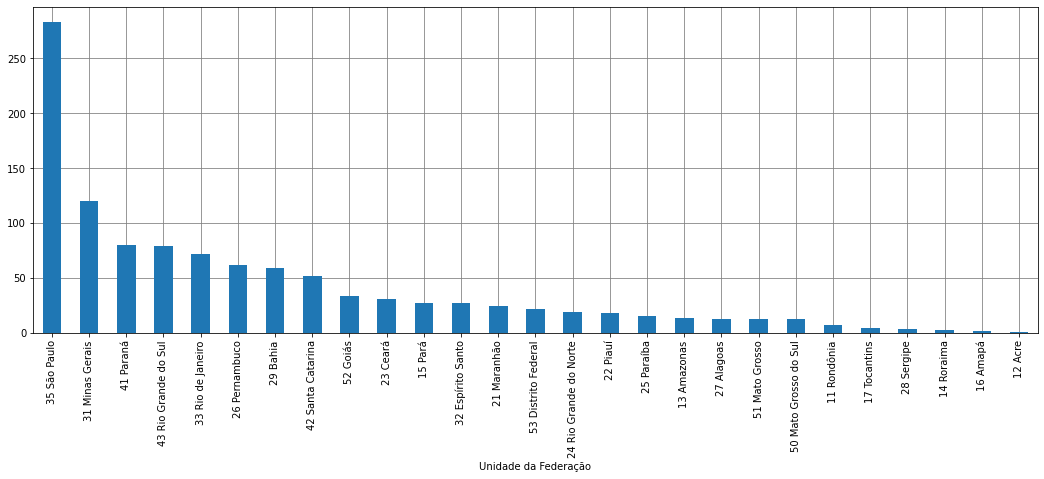

In [ ]:
#é possível colocar grid colocando o parâmetro "grid = True"
#é possível colocar uma linha plt.grid()
#Também dá pra colocar ax.yaxis.grid() ou ax.xaxis.grid(color='gray')

ax = gastos_mais_recentes.sort_values(ascending = False).plot(figsize = (18,6),kind="bar")
ax.set_axisbelow(True)
ax.yaxis.grid(color='gray')
ax.xaxis.grid(color="gray")

####Desafio 13: Comparar gastos dos outros estados em função de SP

Fazer um gráfico e uma tabela do gasto dos outros estados em função do seu estado, ou qualquer outro de interesse.

In [ ]:
gastos_mais_recentes = pd.DataFrame(gastos_mais_recentes)

In [ ]:
gastos_mais_recentes['Cor'] = ["blue", "red", "red", "red", "red", "red", "red", "red", "red", 
                               "red", "red", "red", "red", "red", "red", "red", "red", "red", 
                               "red", "red", "red", "red", "red", "red", "red", "red", "red"]
                                
gastos_mais_recentes.head()

2020/Jul   Cor
Unidade da Federação                
35 São Paulo            282.71  blue
31 Minas Gerais         120.47   red
41 Paraná                80.32   red
43 Rio Grande do Sul     78.93   red
33 Rio de Janeiro        71.54   red

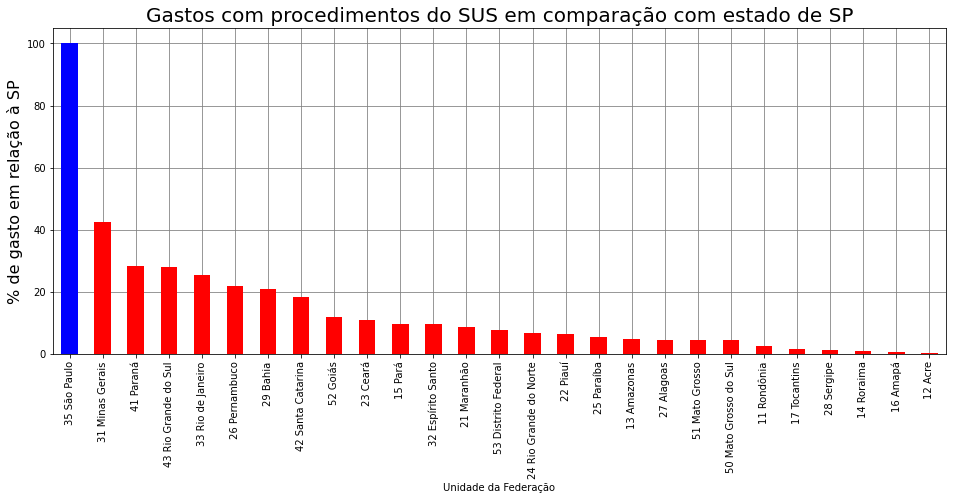

In [ ]:
# O que foi feito diferente nessa daqui é o parâmetro (color = gastos_mais_recentes["Cor"])
#que foram estabelecidas as cores na coluna 

ax = ((gastos_mais_recentes['2020/Jul']/gastos_mais_recentes.loc["35 São Paulo"][0])*100).sort_values(ascending = False).plot(kind = "bar", figsize = (16,6), color = gastos_mais_recentes["Cor"])
ax.set_title("Gastos com procedimentos do SUS em comparação com estado de SP", fontsize = 20)
ax.set_ylabel("% de gasto em relação à SP", fontsize = 16)
ax.set_axisbelow(True)
ax.yaxis.grid(color='gray')
ax.xaxis.grid(color="gray")
plt.show()

####Desafio 14: Estudo de gastos de acordo com a população do estado

Fazer o cálculo proporcional a população do seu estado e mais um a sua escolha.

In [ ]:
# Criação de um df com os dados de população

# Ler o arquivo da estimativa populacional de 2020 que foi divulgado no DOU (Diário Oficial da União)
dados_populacao = pd.read_csv("https://raw.githubusercontent.com/Brunomatarucco/bootcamp_data_science_alura/main/estimativa_dou_2020.csv",encoding="ISO-8859-1",
                              skiprows=2, skipfooter = 7, thousands=".", sep = ";", engine = "python")



# Tratando os dados, retirando as informações que não são uteis para o uso nesse estudo
dados_populacao.dropna(axis = 1, inplace = True)
dados_populacao.columns = ["UF", "Populacao"]
dados_populacao.set_index("UF",inplace = True)
dados_populacao.drop(labels = ["Região Norte","Região Sul", "Região Nordeste", "Região Sudeste", "Região Centro-Oeste"], 
                     axis = 0, inplace= True)

# Visualizar os 5 primeiros dados para verificar como estão os dados
dados_populacao.head()

Populacao
UF                 
Rondônia    1796460
Acre         894470
Amazonas    4207714
Roraima      631181
Pará        8690745

In [ ]:
# Retirando as 3 primeiras letras, ou seja, o número + espaço, de todas
# as labels dos Estados
ufs = gastos_mais_recentes.index
ufs_sem_numero = []
for uf in ufs:
  uf_sem_numero = uf[3:]
  ufs_sem_numero.append(uf_sem_numero)

In [ ]:
# Adequando os dados de gastos do SUS para poder unir os dois dfs

# Renomeando o index, para retirar os números de labels
gastos_mais_recentes.index = [ufs_sem_numero]

# Colocando um index genérico para poder fazer merge através da coluna de nomes de UFs
gastos_mais_recentes.reset_index(inplace=True)

# Renoemando as colunas
gastos_mais_recentes.columns = ["UF", "2020/Jul", "Cor"]

# Retirar a coluna de cores, pois não é útil para esse estudo
gastos_mais_recentes.drop(labels =["Cor"],axis = 1, inplace = True)

# Multiplicando novamente por 1milhão para retornar aos valores originais de gastos reais no mês de Julho
gastos_mais_recentes['2020/Jul'] = gastos_mais_recentes['2020/Jul']*1000000

gastos_mais_recentes.head()

UF     2020/Jul
0          São Paulo 282709570.31
1       Minas Gerais 120467187.34
2             Paraná  80320852.69
3  Rio Grande do Sul  78929703.81
4     Rio de Janeiro  71540227.33

In [ ]:
# Criação de um novo df realizando a merge dos dois dfs, o de gastos do mês de Julho de 2020 e a estimativa da população também de Jul de 2020 

populacao_e_gasto = pd.merge(left = gastos_mais_recentes,right = dados_populacao, on = "UF", how = "left")
populacao_e_gasto

UF     2020/Jul  Populacao
0             São Paulo 282709570.31   46289333
1          Minas Gerais 120467187.34   21292666
2                Paraná  80320852.69   11516840
3     Rio Grande do Sul  78929703.81   11422973
4        Rio de Janeiro  71540227.33   17366189
5                 Bahia  58898100.40   14930634
6            Pernambuco  62325444.34    9616621
7        Santa Catarina  51764534.76    7252502
8                 Ceará  30809221.22    9187103
9                 Goiás  33499284.38    7113540
10                 Pará  27618727.51    8690745
11             Maranhão  24374205.15    7114598
12       Espírito Santo  27460475.47    4064052
13  Rio Grande do Norte  19593057.45    3534165
14              Paraíba  15491469.06    4039277
15     Distrito Federal  22233542.26    3055149
16   Mato Grosso do Sul  12508717.35    2809394
17                Piauí  18019214.49    3281480
18              Alagoas  13087850.40    3351543
19          Mato Grosso  13083151.70    3526220
20             Amazonas  13358514.02    4207714
21              Sergipe   3312766.32    2318822
22            Tocantins   4489665.87    1590248
23             Rondônia   7407388.24    1796460
24                 Acre   1163813.08     894470
25              Roraima   2739498.41     631181
26                Amapá   2155083.37     861773

In [ ]:
# Criação de uma nova coluna que calcula o gasto de procedimentos do SUS por habitante. 

populacao_e_gasto["gasto_por_habitante"] = populacao_e_gasto["2020/Jul"]/populacao_e_gasto["Populacao"]
populacao_e_gasto.set_index("UF",inplace = True)
populacao_e_gasto.head()

2020/Jul  Populacao  gasto_por_habitante
UF                                                            
São Paulo         282709570.31   46289333                 6.11
Minas Gerais      120467187.34   21292666                 5.66
Paraná             80320852.69   11516840                 6.97
Rio Grande do Sul  78929703.81   11422973                 6.91
Rio de Janeiro     71540227.33   17366189                 4.12

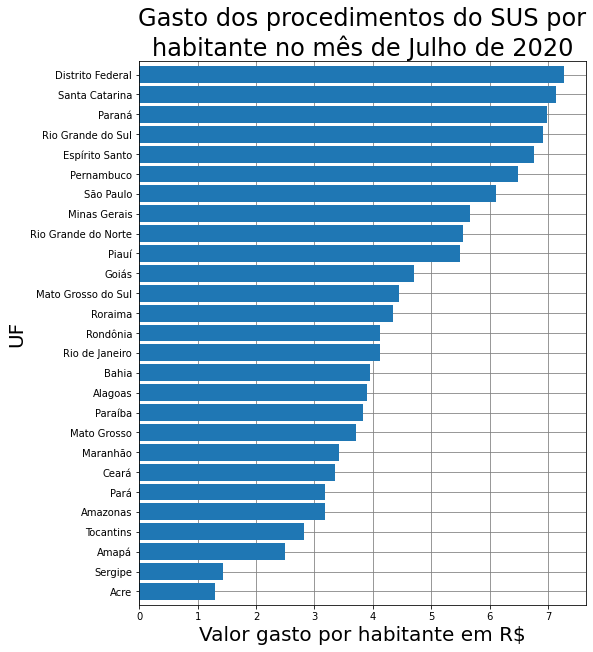

In [ ]:
ax = populacao_e_gasto.gasto_por_habitante.sort_values(ascending = True).plot(kind = "barh", figsize = (8,10), width = 0.85)
ax.set_title("Gasto dos procedimentos do SUS por\nhabitante no mês de Julho de 2020", fontsize = 24)
ax.set_ylabel("UF", fontsize = 20)
ax.set_xlabel("Valor gasto por habitante em R$",fontsize = 20)
ax.set_axisbelow(True)
ax.yaxis.grid(color='gray')
ax.xaxis.grid(color="gray")
plt.show()

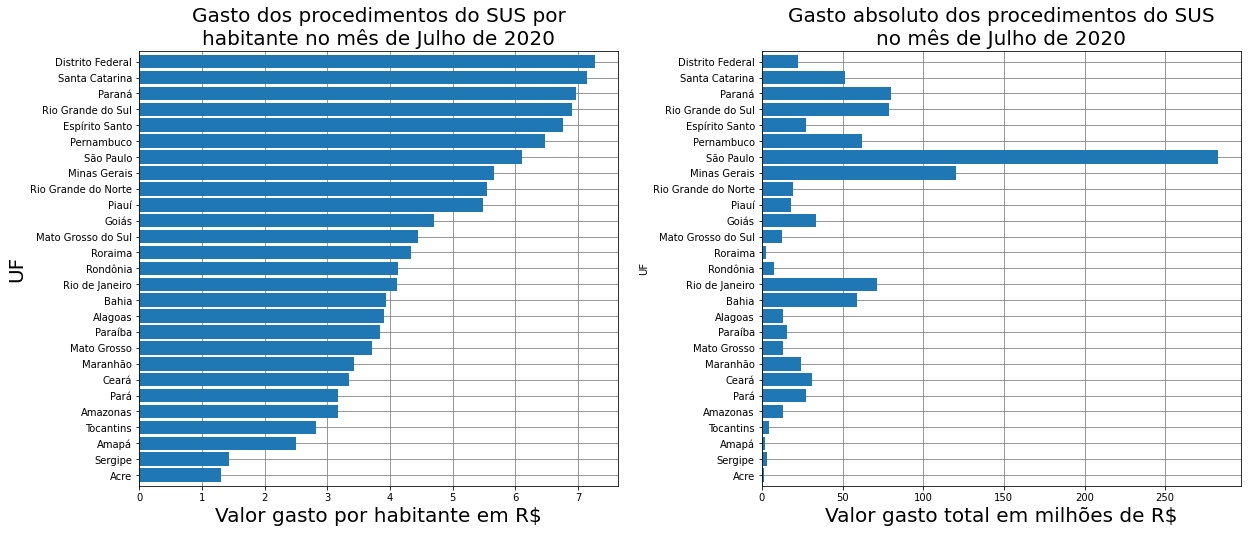

In [ ]:
ordenados_por_habitante = populacao_e_gasto.sort_values(by = "gasto_por_habitante", ascending = True)


plt.figure(figsize=(18,8))

plt.subplot(1, 2, 1)
ax1 = populacao_e_gasto.gasto_por_habitante.sort_values(ascending = True).plot(kind = "barh", width = 0.85)
ax1.set_title("Gasto dos procedimentos do SUS por\nhabitante no mês de Julho de 2020", fontsize = 20)
ax1.set_ylabel("UF", fontsize = 20)
ax1.set_xlabel("Valor gasto por habitante em R$",fontsize = 20)
ax1.set_axisbelow(True)
ax1.yaxis.grid(color='gray')
ax1.xaxis.grid(color="gray")

plt.subplot(1, 2, 2)
ax2 = (ordenados_por_habitante["2020/Jul"]/1000000).plot(kind = "barh", width = 0.85)
ax2.set_title("Gasto absoluto dos procedimentos do SUS\nno mês de Julho de 2020", fontsize = 20)
ax2.set_xlabel("Valor gasto total em milhões de R$",fontsize = 20)
ax2.set_axisbelow(True)
ax2.yaxis.grid(color='gray')
ax2.xaxis.grid(color="gray")
plt.subplots_adjust(left = 0.05, wspace=0.3)

plt.show()

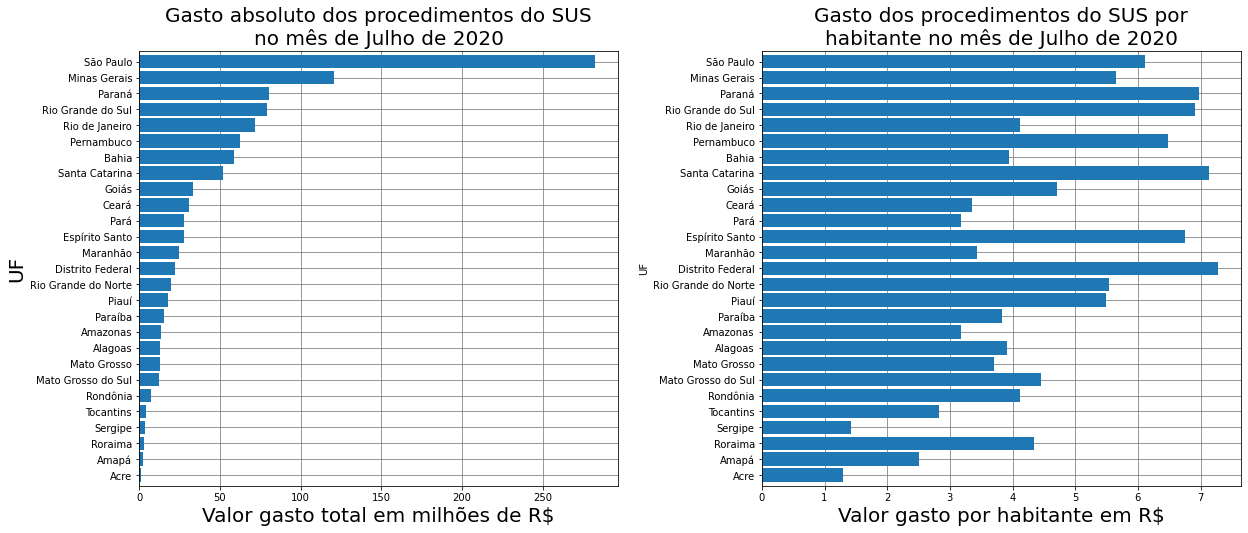

In [ ]:
ordenados_por_total = populacao_e_gasto.sort_values(by = "2020/Jul", ascending = True)


plt.figure(figsize=(18,8))

plt.subplot(1, 2, 2)
ax1 = ordenados_por_total.gasto_por_habitante.plot(kind = "barh", width = 0.85)
ax1.set_title("Gasto dos procedimentos do SUS por\nhabitante no mês de Julho de 2020", fontsize = 20)
ax1.set_xlabel("Valor gasto por habitante em R$",fontsize = 20)
ax1.set_axisbelow(True)
ax1.yaxis.grid(color='gray')
ax1.xaxis.grid(color="gray")

plt.subplot(1, 2, 1)
ax2 = (ordenados_por_total["2020/Jul"]/1000000).plot(kind = "barh", width = 0.85)
ax2.set_title("Gasto absoluto dos procedimentos do SUS\nno mês de Julho de 2020", fontsize = 20)
ax2.set_xlabel("Valor gasto total em milhões de R$",fontsize = 20)
ax2.set_ylabel("UF", fontsize = 20)
ax2.set_axisbelow(True)
ax2.yaxis.grid(color='gray')
ax2.xaxis.grid(color="gray")
plt.subplots_adjust(left = 0.05, wspace=0.3)

plt.show()

Os dois gráficos acima foram plotados para fazer uma comparação e testar a hipótese de uma possivel relação entre o valor gasto total no mês de Jul de 2020 e quanto esse valor significa por habitante.

Não é possível visualizar uma relação direta e significativa entre esses dois valores, existe sim uma certa tendência dos maiores gastos por habitantes também terem gastos altos absolutos, mas não há uma correlação entre os dados. Alguns exemplos para mostrar isso são: 

- Distrito Federal tem o maior gasto por habitante, porém está na faixa do meio dos gastos absolutos;
- O estado do Pará está como 11º maior gasto total, porém 22º em gasto por habitantes;
- São Paulo que tem o maior gasto total com uma diferença bem grande do segundo maior está como o 6º maior gasto por habitante.

####Desafio 15:

Faça uma análise dos dados analisados, levante hipóteses e compartilhe com a gente no Discord.

##Super Desafio: Escolha outro valor fora o valor aprovado no TABNET e explore estes dados. Esse será nosso projeto do módulo, mais detalhes no Desafio do módulo 1 na página do bootcamp.